# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report,f1_score,precision_score,recall_score,roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier, AdaBoostClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE


import warnings
warnings.filterwarnings('ignore')
sns.set
plt.style.use('ggplot')
%matplotlib inline

# Importing Dataset and Discriptive Statistics

In [ ]:
df=pd.read_csv(r"C:\\Users\\priya\\Downloads\\project-data (1) (1) (1).csv")

In [ ]:
df

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,no_disease,32,m,38.5,52.5,7.7,22.1,7.5,6.93,3.23,106.0,12.1,69
1,no_disease,32,m,38.5,70.3,18.0,24.7,3.9,11.17,4.80,74.0,15.6,76.5
2,no_disease,32,m,46.9,74.7,36.2,52.6,6.1,8.84,5.20,86.0,33.2,79.3
3,no_disease,32,m,43.2,52.0,30.6,22.6,18.9,7.33,4.74,80.0,33.8,75.7
4,no_disease,32,m,39.2,74.1,32.6,24.8,9.6,9.15,4.32,76.0,29.9,68.7
...,...,...,...,...,...,...,...,...,...,...,...,...,...
610,cirrhosis,62,f,32.0,416.6,5.9,110.3,50.0,5.57,6.30,55.7,650.9,68.5
611,cirrhosis,64,f,24.0,102.8,2.9,44.4,20.0,1.54,3.02,63.0,35.9,71.3
612,cirrhosis,64,f,29.0,87.3,3.5,99.0,48.0,1.66,3.63,66.7,64.2,82
613,cirrhosis,46,f,33.0,NaN,39.0,62.0,20.0,3.56,4.20,52.0,50.0,71


In [ ]:
df['category'].value_counts()

 no_disease        533
 cirrhosis          30
 hepatitis          24
 fibrosis           21
suspect_disease      7
Name: category, dtype: int64

In [ ]:
df.duplicated().sum()

0

In [ ]:
df.describe()

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase
count,615.000000,614.000000,597.000000,614.000000,615.000000,615.000000,615.000000,605.000000,615.000000,615.000000
mean,47.408130,41.620195,68.283920,28.450814,34.786341,11.396748,8.196634,5.368099,81.287805,39.533171
std,10.055105,5.780629,26.028315,25.469689,33.090690,19.673150,2.205657,1.132728,49.756166,54.661071
min,19.000000,14.900000,11.300000,0.900000,10.600000,0.800000,1.420000,1.430000,8.000000,4.500000
25%,39.000000,38.800000,52.500000,16.400000,21.600000,5.300000,6.935000,4.610000,67.000000,15.700000
50%,47.000000,41.950000,66.200000,23.000000,25.900000,7.300000,8.260000,5.300000,77.000000,23.300000
75%,54.000000,45.200000,80.100000,33.075000,32.900000,11.200000,9.590000,6.060000,88.000000,40.200000
max,77.000000,82.200000,416.600000,325.300000,324.000000,254.000000,16.410000,9.670000,1079.100000,650.900000


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 615 entries, 0 to 614
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   category                     615 non-null    object 
 1   age                          615 non-null    int64  
 2   sex                          615 non-null    object 
 3   albumin                      614 non-null    float64
 4   alkaline_phosphatase         597 non-null    float64
 5   alanine_aminotransferase     614 non-null    float64
 6   aspartate_aminotransferase   615 non-null    float64
 7   bilirubin                    615 non-null    float64
 8   cholinesterase               615 non-null    float64
 9   cholesterol                  605 non-null    float64
 10  creatinina                   615 non-null    float64
 11  gamma_glutamyl_transferase   615 non-null    float64
 12  protein                      615 non-null    object 
dtypes: float64(9), int64

# Handling Missing Values

In [ ]:
# Impute missing values with mean or mode for each column
for col in df.columns:
    if df[col].dtype == 'object':
        # Impute with mode for categorical columns
        df[col] = df[col].fillna(df[col].mode()[0])
    else:
        # Impute with median for numerical columns
        df[col] = df[col].fillna(df[col].median())

# Print the modified dataframe
print(df)

        category  age sex  albumin  alkaline_phosphatase  \
0     no_disease   32   m     38.5                  52.5   
1     no_disease   32   m     38.5                  70.3   
2     no_disease   32   m     46.9                  74.7   
3     no_disease   32   m     43.2                  52.0   
4     no_disease   32   m     39.2                  74.1   
..           ...  ...  ..      ...                   ...   
610    cirrhosis   62   f     32.0                 416.6   
611    cirrhosis   64   f     24.0                 102.8   
612    cirrhosis   64   f     29.0                  87.3   
613    cirrhosis   46   f     33.0                  66.2   
614    cirrhosis   59   f     36.0                  66.2   

     alanine_aminotransferase  aspartate_aminotransferase  bilirubin  \
0                         7.7                        22.1        7.5   
1                        18.0                        24.7        3.9   
2                        36.2                        52.6      

In [ ]:
df.isna().sum()

category                       0
age                            0
sex                            0
albumin                        0
alkaline_phosphatase           0
alanine_aminotransferase       0
aspartate_aminotransferase     0
bilirubin                      0
cholinesterase                 0
cholesterol                    0
creatinina                     0
gamma_glutamyl_transferase     0
protein                        0
dtype: int64

# Univariate Analysis

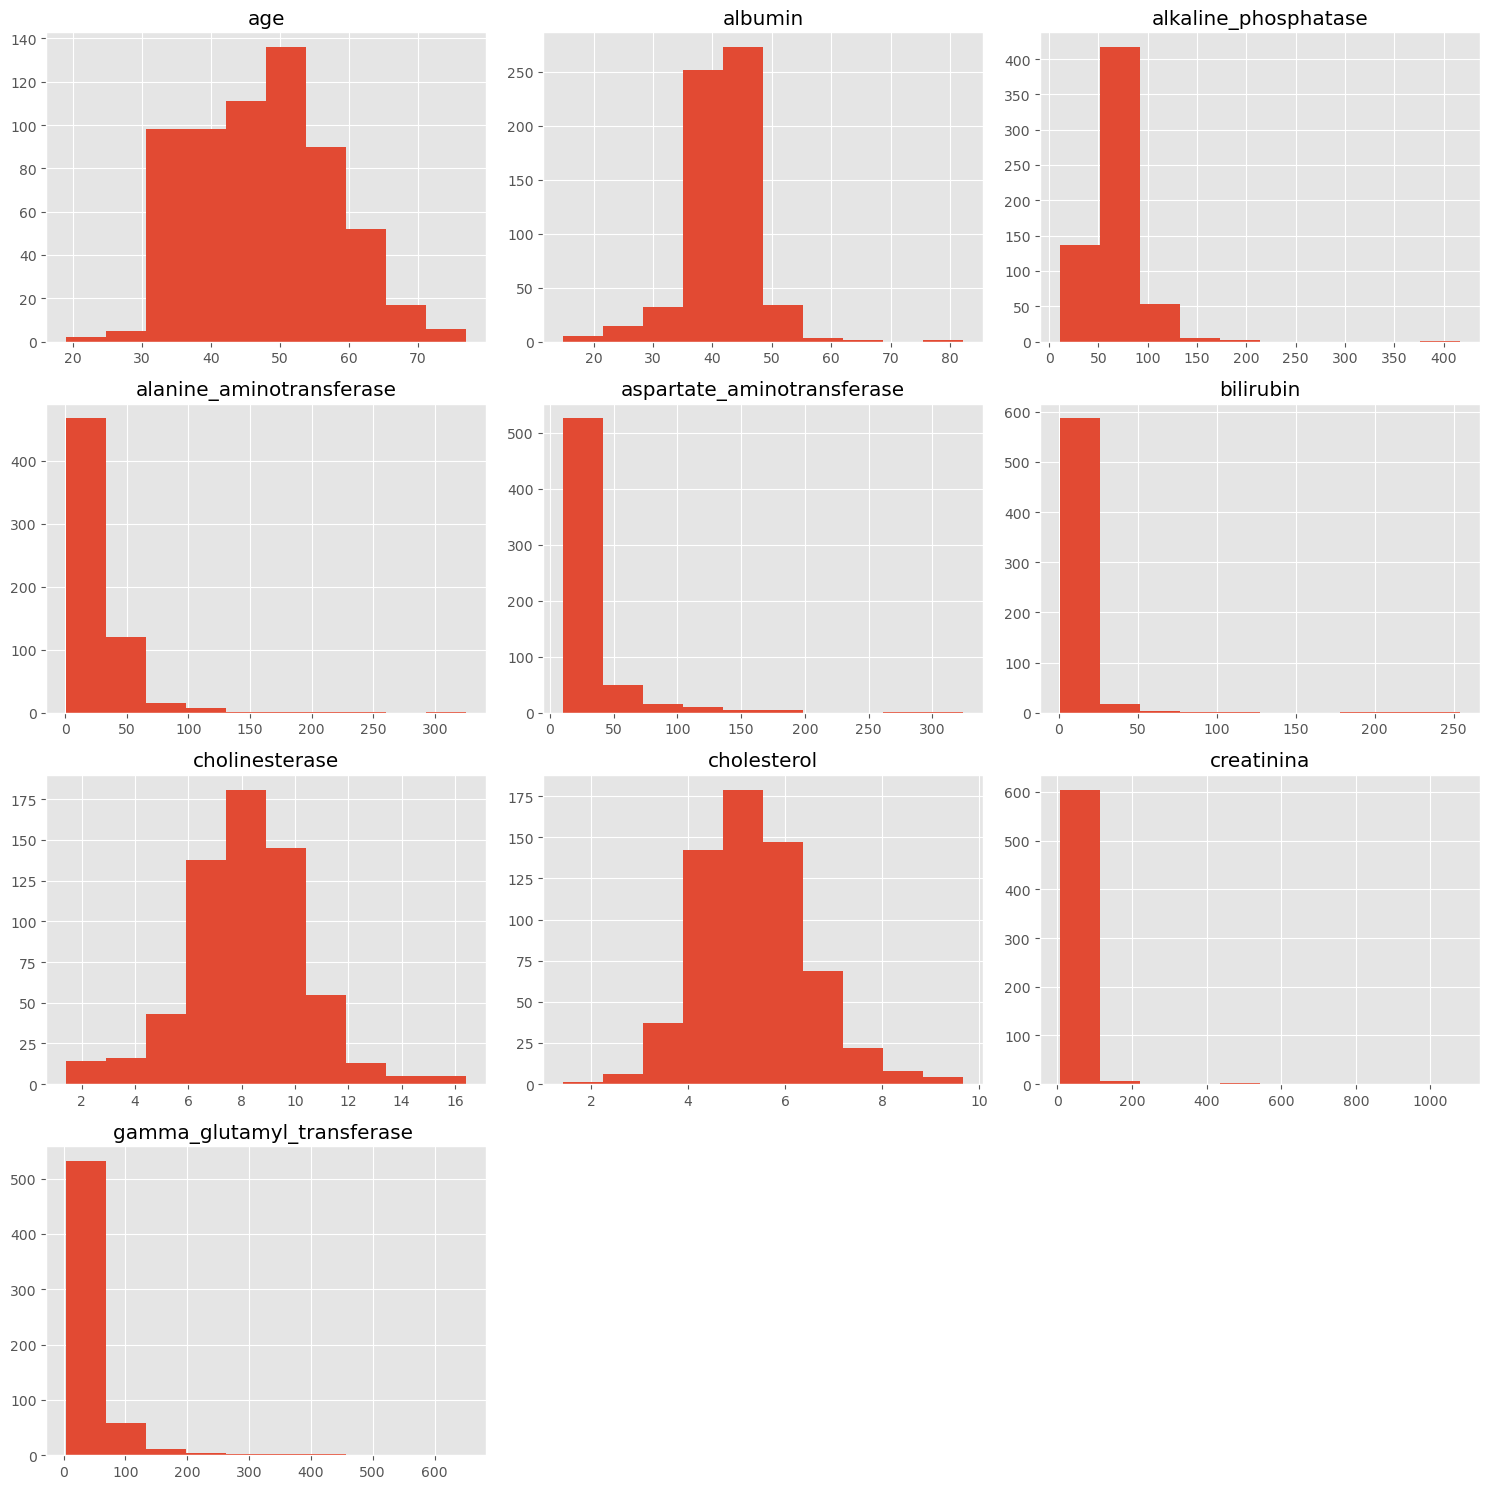

In [ ]:
# Create histograms for all numerical columns
df.hist(figsize=(15,15))
plt.tight_layout()  # Adjust spacing between subplots
plt.show()

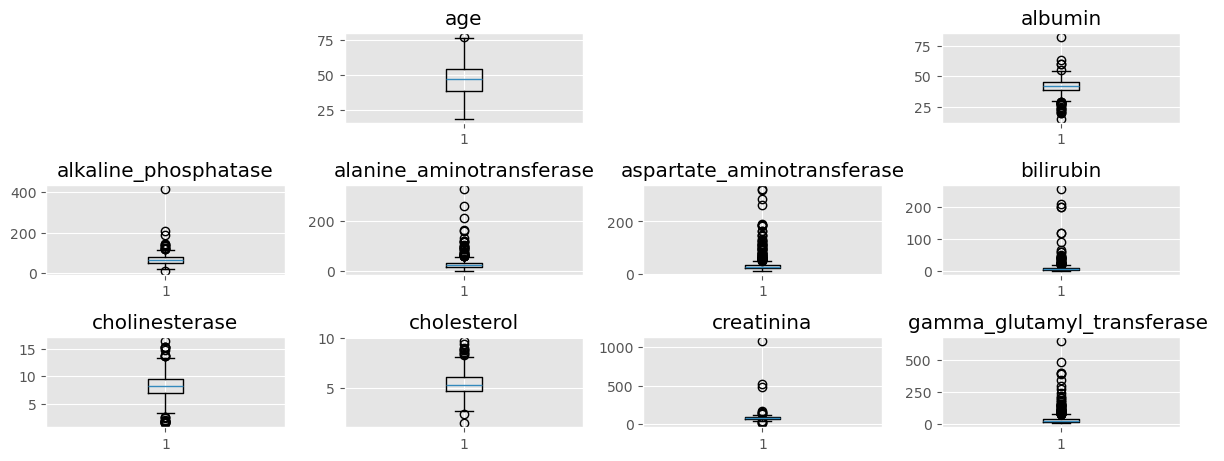

In [ ]:
# Boxplot for Outlier Detection
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Loop through each column
for i, col in enumerate(df.columns):
    # Skip categorical columns
    if df[col].dtype == 'object':
        continue

    # Create a subplot at a specific position
    plt.subplot(4, 4, i+1)
    plt.boxplot(df[col])
    plt.title(col)
    plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

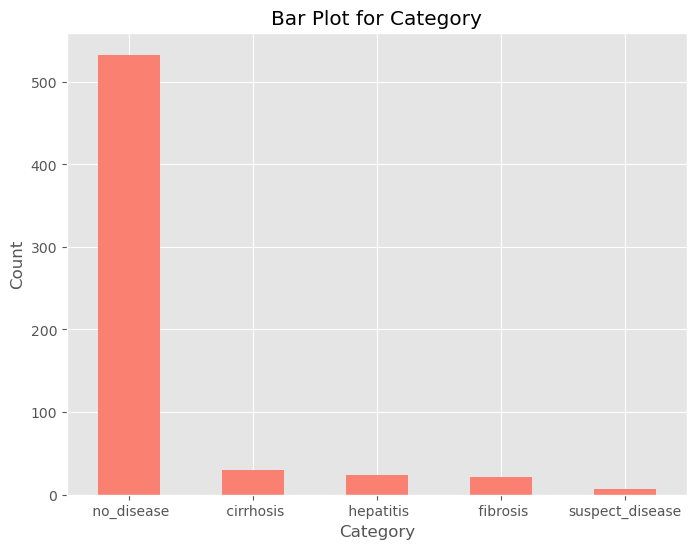

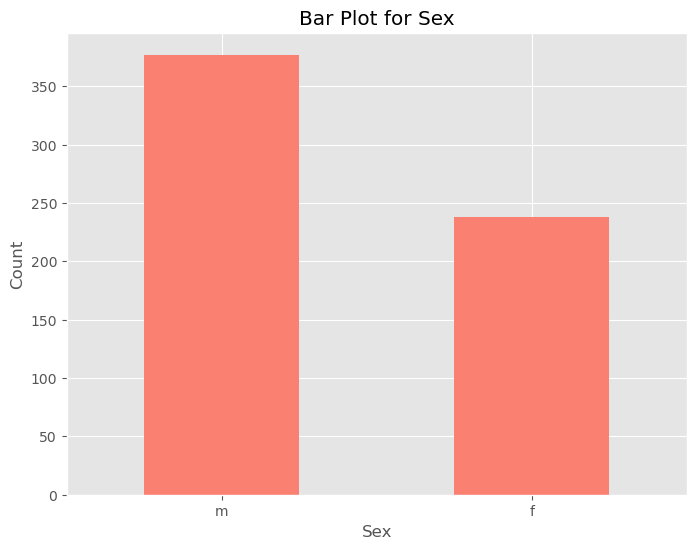

In [ ]:
# Bar plot for 'category'
df['category'].value_counts().plot(kind='bar', figsize=(8, 6), color='salmon')
plt.title('Bar Plot for Category')
plt.xlabel('Category')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()

# Bar plot for 'sex'
df['sex'].value_counts().plot(kind='bar', figsize=(8, 6), color='salmon')
plt.title('Bar Plot for Sex')
plt.xlabel('Sex')
plt.ylabel('Count')
plt.xticks(rotation=0)
plt.show()


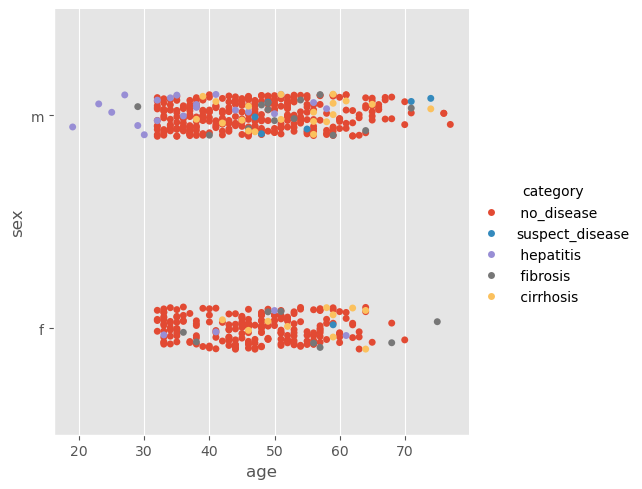

In [ ]:
#Disease ratio/visualization with respect to age and Gender
sns.catplot(x="age", y="sex", hue="category", data=df, kind="strip")
plt.show()


# Bivariate Analysis

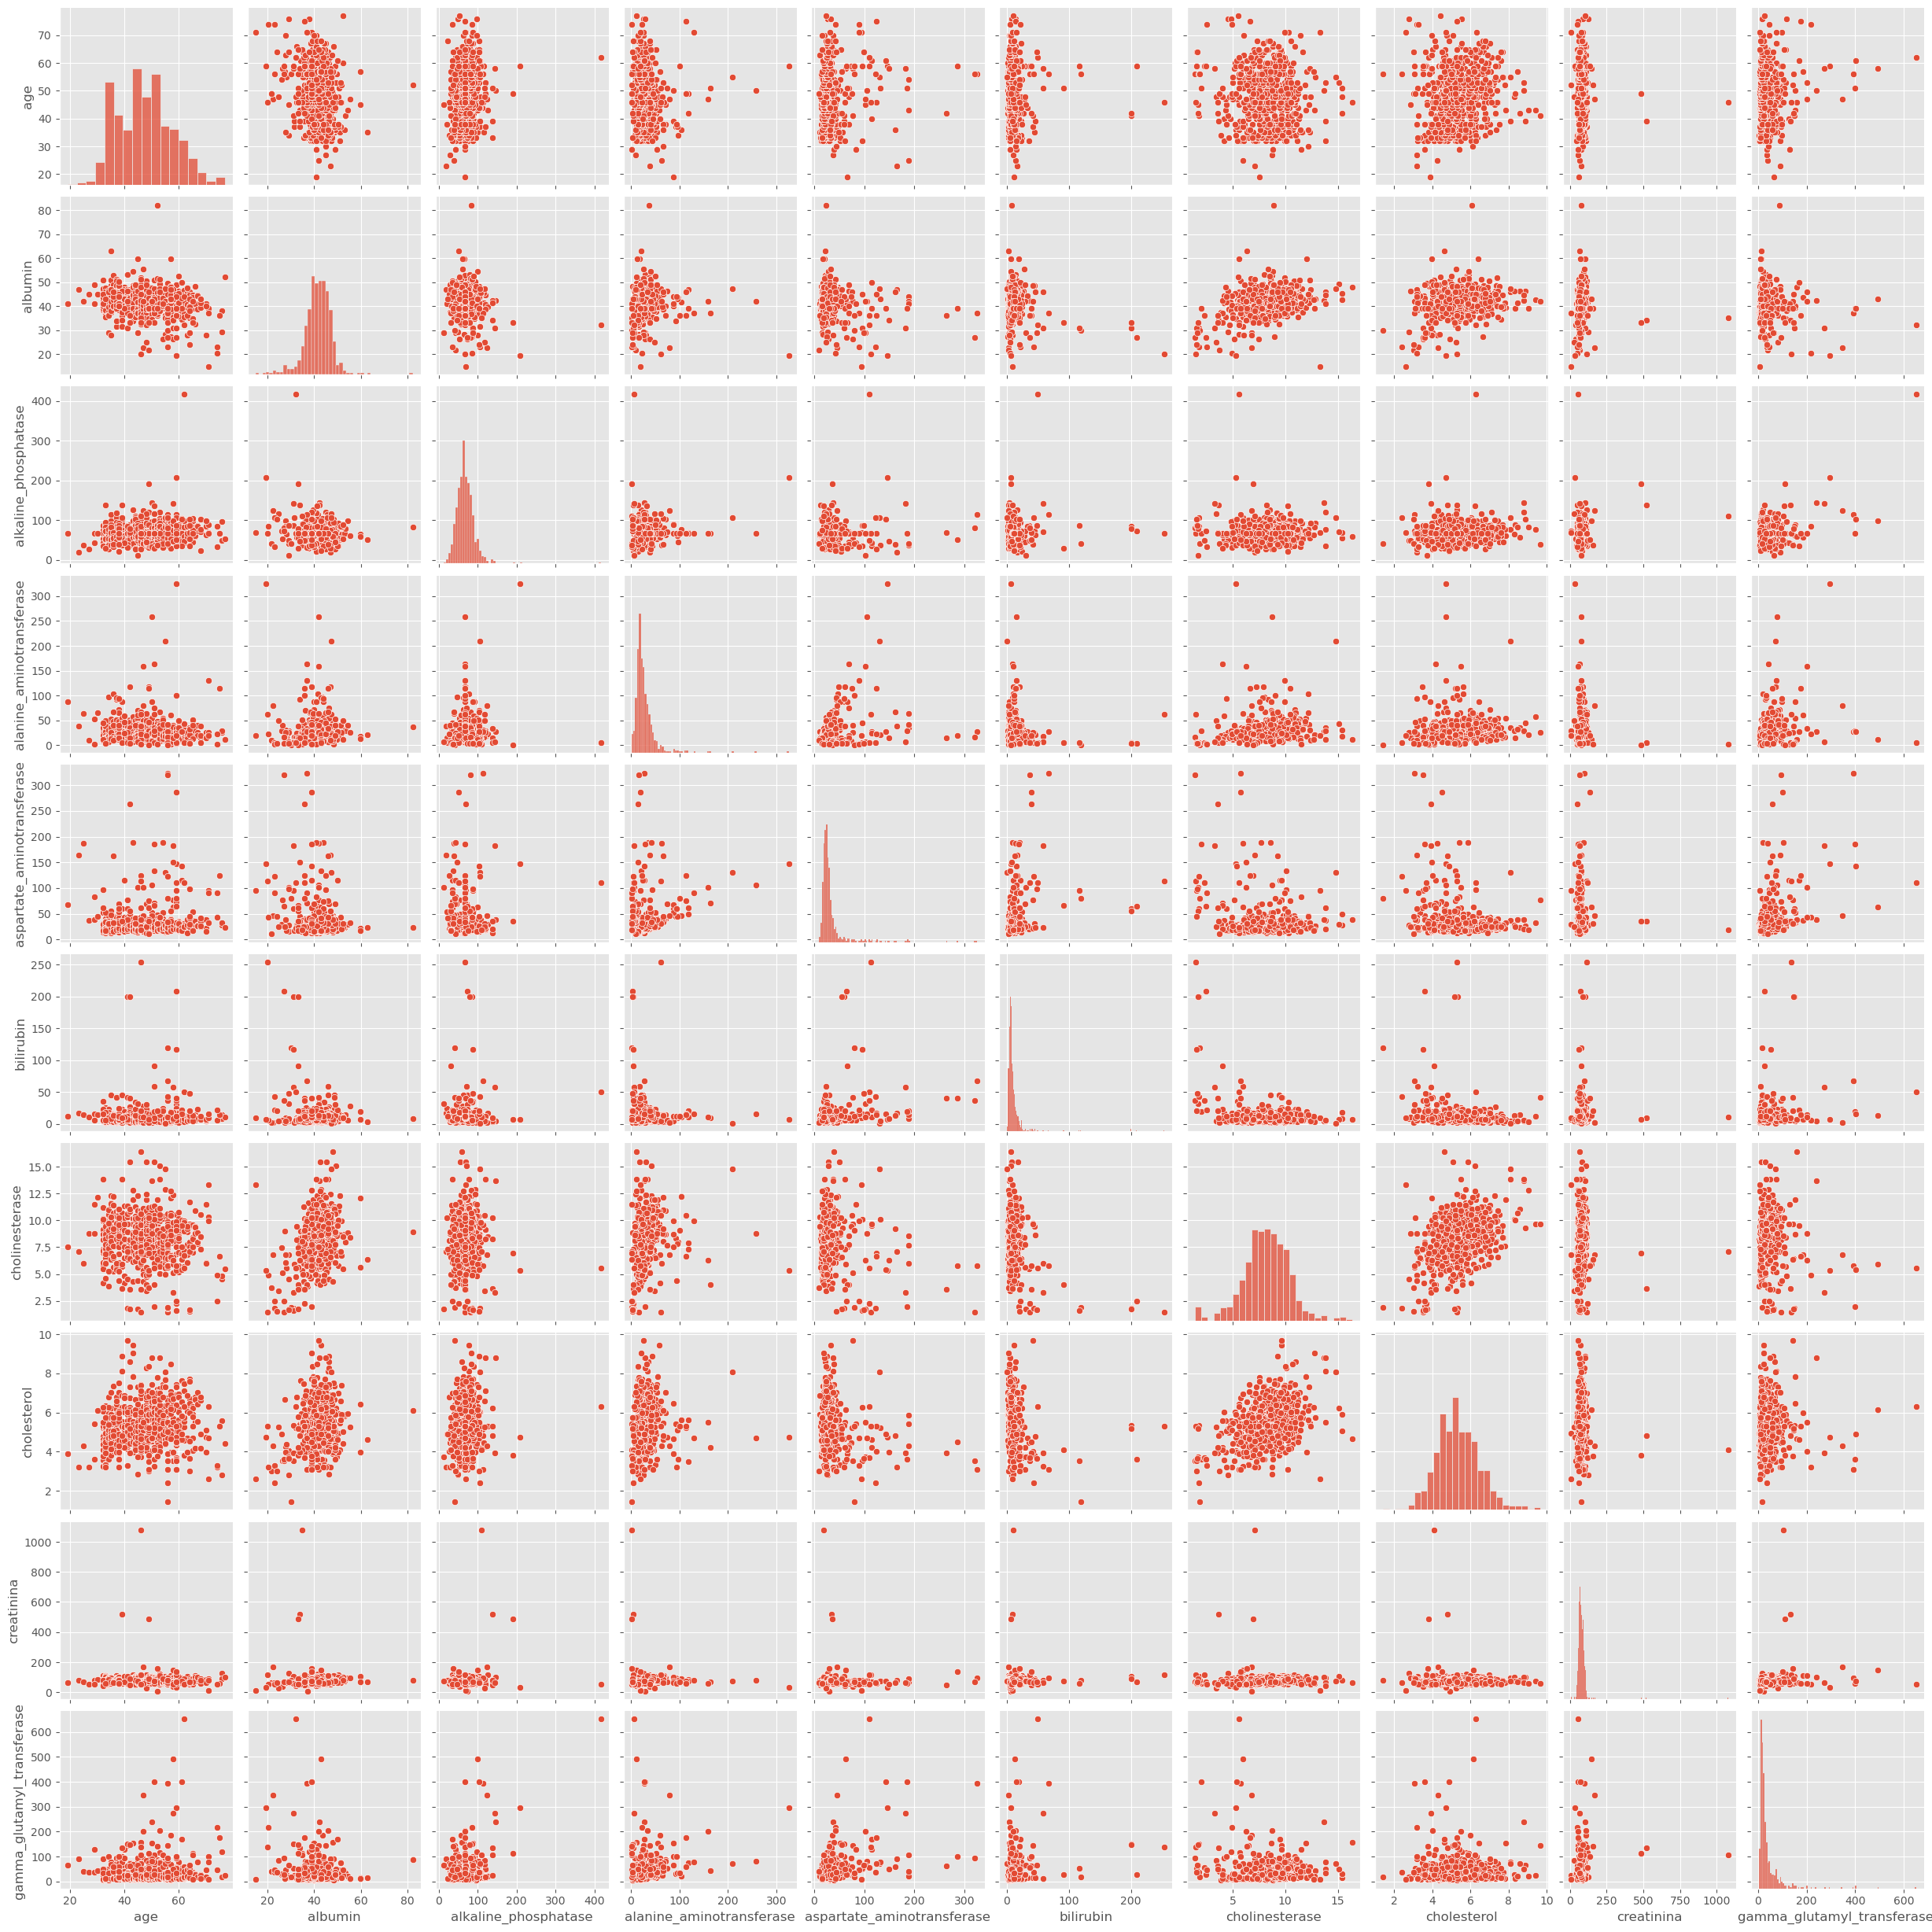

In [ ]:
sns.pairplot(df)
plt.show()

# Multivariate Analysis

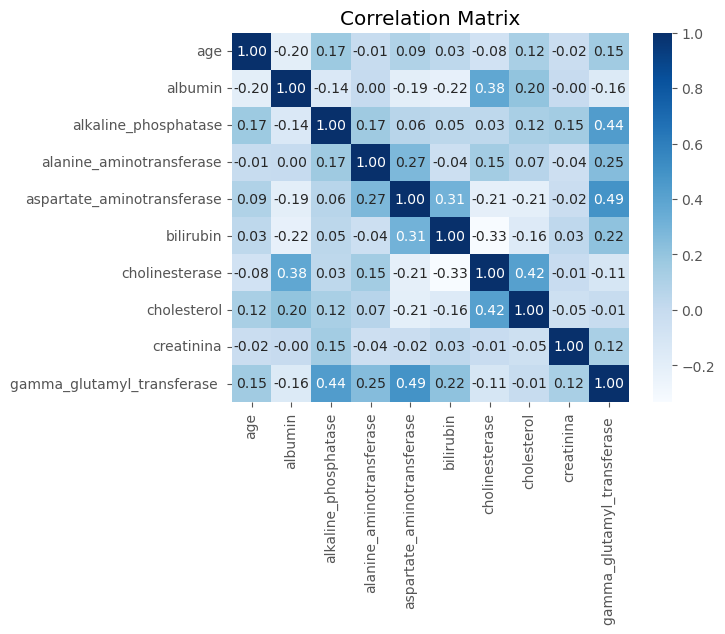

In [ ]:
# Create heatmap
sns.heatmap(df.corr(), annot=True, cmap='Blues',fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Outlier Detection and Removal

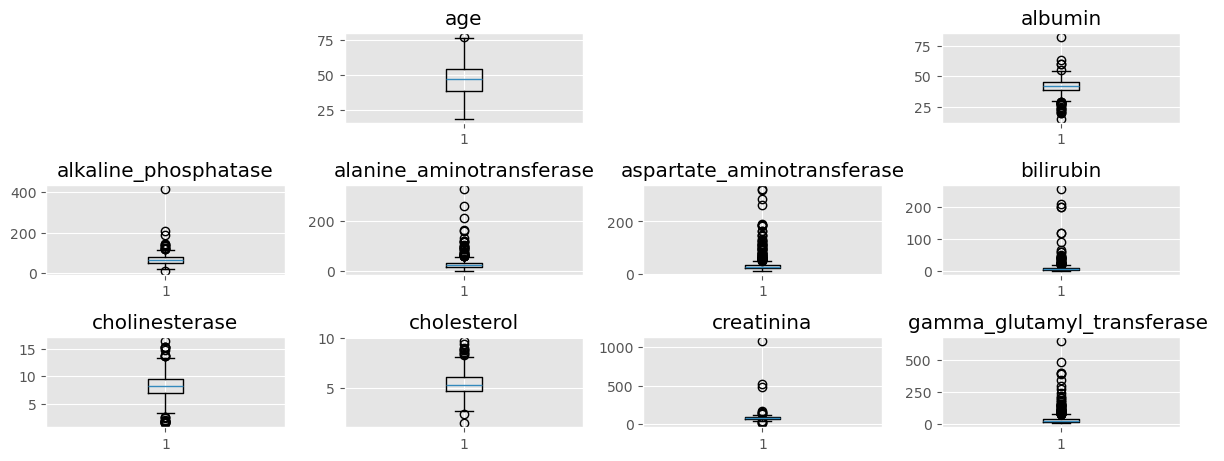

In [ ]:
# Boxplot for Outlier Detection
import matplotlib.pyplot as plt
plt.figure(figsize=(12, 6))

# Loop through each column
for i, col in enumerate(df.columns):
    # Skip categorical columns
    if df[col].dtype == 'object':
        continue

    # Create a subplot at a specific position
    plt.subplot(4, 4, i+1)
    plt.boxplot(df[col])
    plt.title(col)
    plt.grid(True)

# Adjust layout and show the plot
plt.tight_layout()
plt.show()

Outliers detected by IQR:


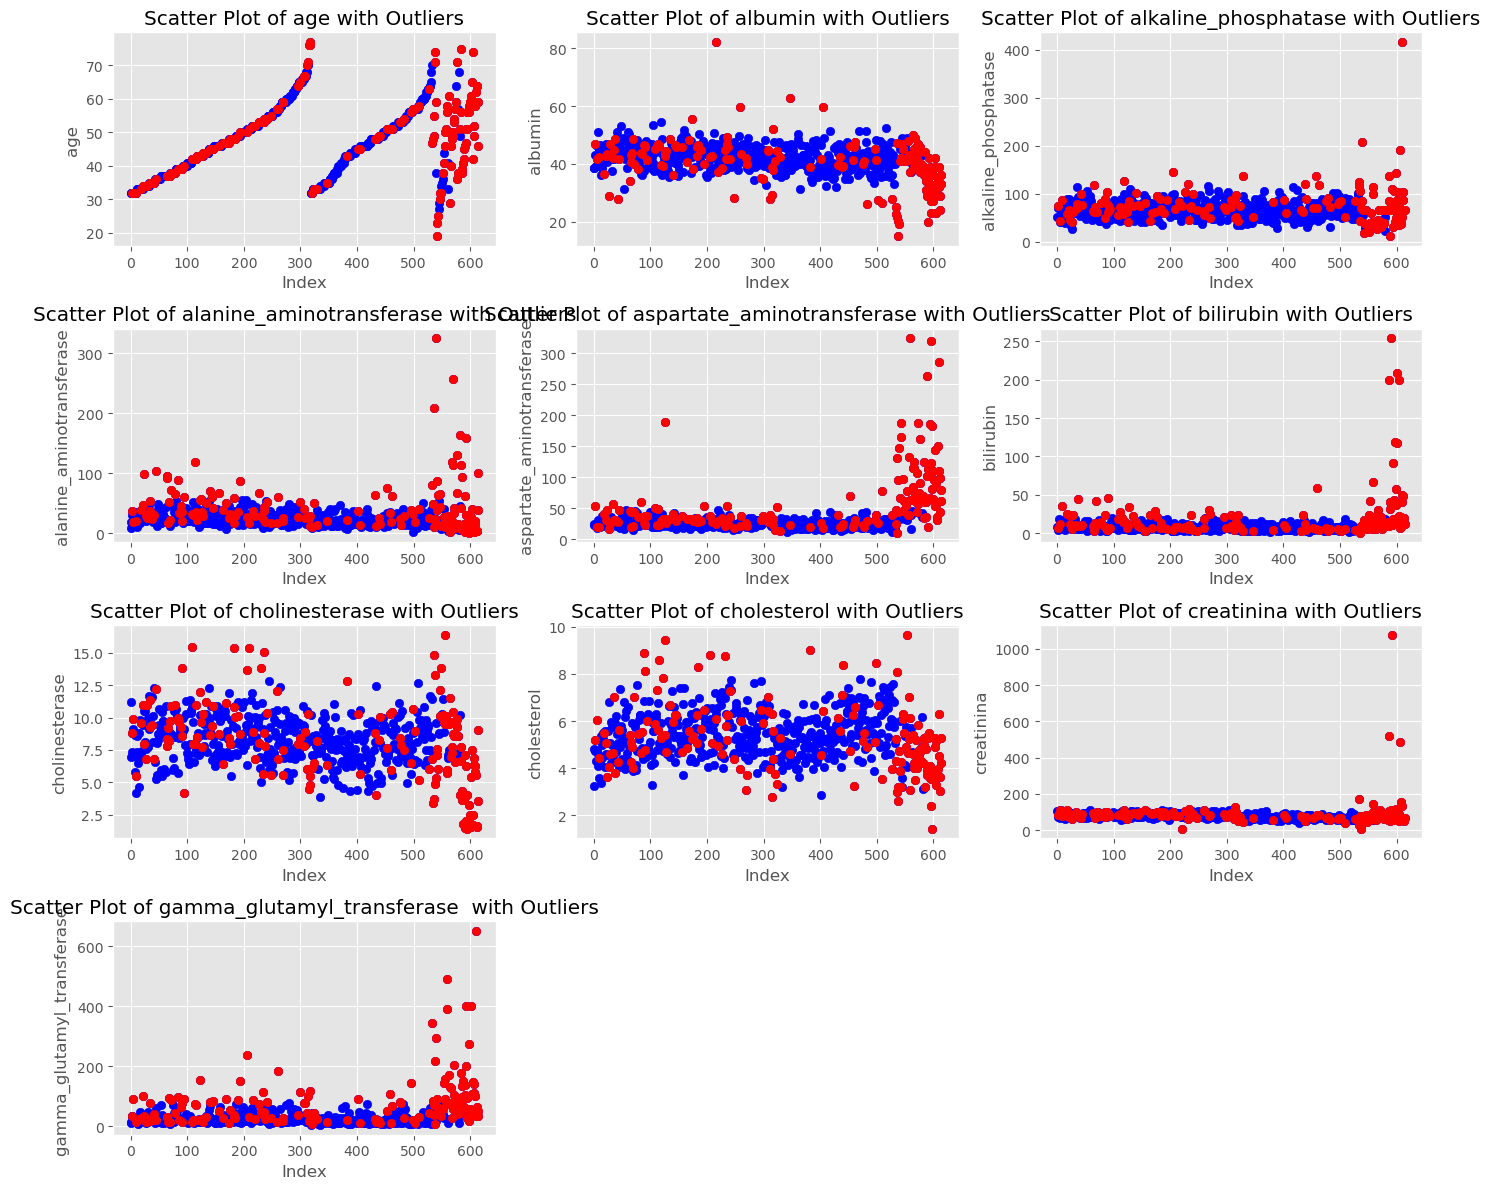

In [ ]:
# Function to detect outliers using IQR for numerical columns only
def detect_outliers_iqr(df, threshold=1.5):

    outliers = []
    for col in df.select_dtypes(include=np.number).columns:
        q1 = df[col].quantile(0.25)
        q3 = df[col].quantile(0.75)
        iqr = q3 - q1
        lower_bound = q1 - threshold * iqr
        upper_bound = q3 + threshold * iqr
        col_outliers = df[(df[col] < lower_bound) | (df[col] > upper_bound)]
        outliers.append(col_outliers)

    if outliers:
        outliers = pd.concat(outliers)
        outliers = outliers.drop_duplicates()
        return outliers
    else:
        return pd.DataFrame()

# Outliers for all numerical columns
outliers = detect_outliers_iqr(df)
print("Outliers detected by IQR:")
# print(outliers)

# Calculate the number of rows and columns to accommodate all subplots
num_cols = len(df.select_dtypes(include=np.number).columns)
num_rows = int(np.ceil(num_cols / 3))  # Calculate rows considering potential remainder

# Visualize outliers using scatter plots for all numerical columns
plt.figure(figsize=(14, num_rows * 3))  # Adjust figure size based on rows
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(num_rows, 3, i+1)
    plt.scatter(df.index, df[col], color='blue')
    plt.scatter(outliers.index, outliers[col], color='red')
    plt.title(f'Scatter Plot of {col} with Outliers')
    plt.xlabel('Index')
    plt.ylabel(col)
plt.tight_layout()
plt.show()

In [ ]:
#Outlier handling with capping method
def outlier_detection(data, columns):

    for col in columns:
        q1 = data[col].quantile(0.25)
        q3 = data[col].quantile(0.75)
        iqr = q3-q1

        lower = q1-(1.5*iqr)
        upper = q3+(1.5*iqr)

        df[col] = np.where(df[col] > upper, upper, np.where(df[col] < lower, lower,df[col]))

#Using the function that we juct created
outlier_detection(df,df.select_dtypes(include=np.number).columns)

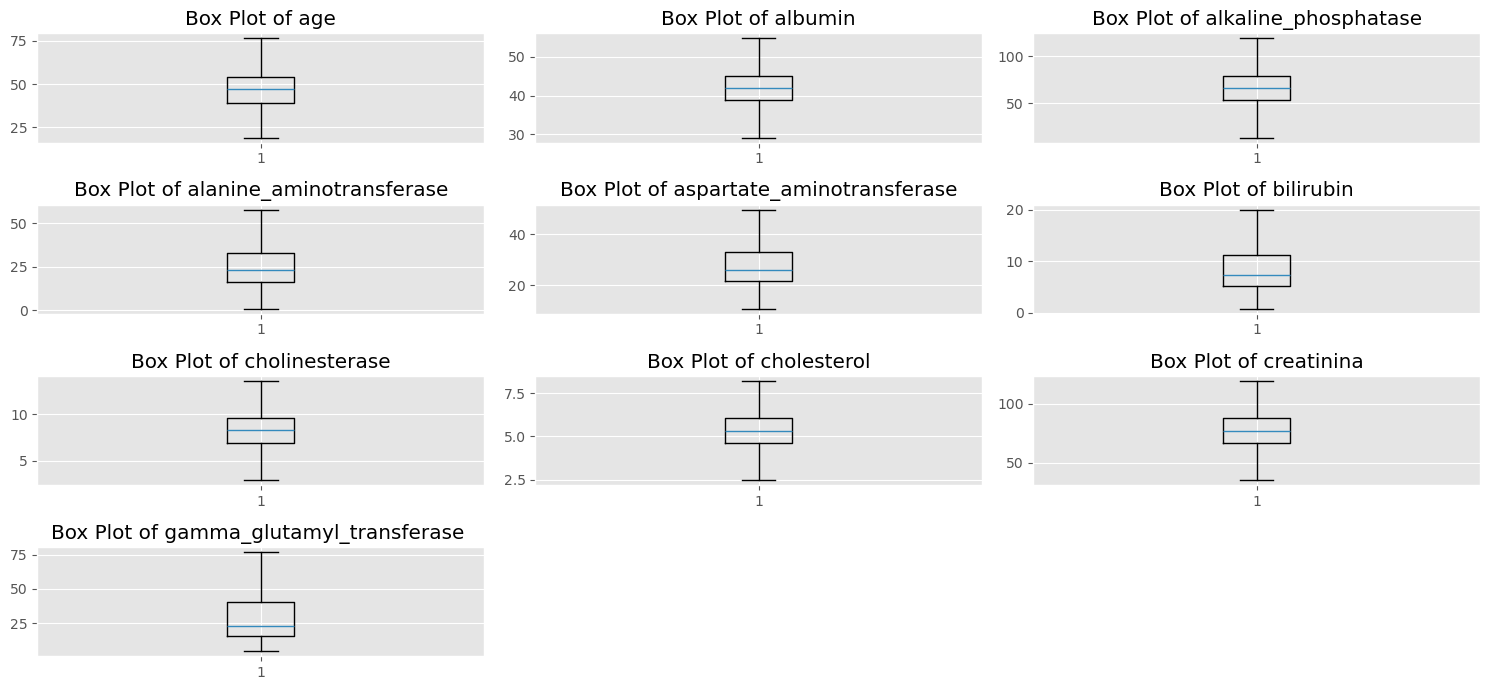

In [ ]:
# Visualize data after handling outliers
plt.figure(figsize=(15, 7))
for i, col in enumerate(df.select_dtypes(include=np.number).columns):
    plt.subplot(num_rows, 3, i+1)
    plt.boxplot(df[col])
    plt.title(f'Box Plot of {col}')
plt.tight_layout()
plt.show()

In [ ]:
df_cleaned = df.copy()

# Feature Scaling

In [ ]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
numerical_cols =df_cleaned.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = df_cleaned.select_dtypes(include=['object']).columns

In [ ]:
scaler = StandardScaler()
df_cleaned[numerical_cols] = scaler.fit_transform(df_cleaned[numerical_cols])

Label Encoding For Categorical column

In [ ]:
encoder = LabelEncoder()
for col in categorical_cols:
    df_cleaned[col] = encoder.fit_transform(df_cleaned[col])

In [ ]:
df_cleaned.head()

,category,age,sex,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,creatinina,gamma_glutamyl_transferase,protein
0,3,-1.533898,1,-0.642747,-0.748053,-1.346261,-0.661420,-0.274541,-0.612353,-1.958618,1.800788,-0.903424,69
1,3,-1.533898,1,-0.642747,0.152607,-0.582695,-0.399597,-0.991030,1.428327,-0.514037,-0.283815,-0.741189,144
2,3,-1.533898,1,1.042880,0.375242,0.766520,2.133046,-0.553176,0.306916,-0.145992,0.497911,0.074621,170
3,3,-1.533898,1,0.300401,-0.773352,0.351377,-0.611070,1.994341,-0.419836,-0.569244,0.107048,0.102432,136
4,3,-1.533898,1,-0.502278,0.344883,0.499642,-0.389526,0.143411,0.456117,-0.955693,-0.153528,-0.078344,66


In [ ]:
# Saving the cleaned DataFrame to my system
# df_cleaned.to_csv("C:/Users/priya/Downloads/cleaned_data.csv",index=False)

# Feature selection for Dimensionality Reduction

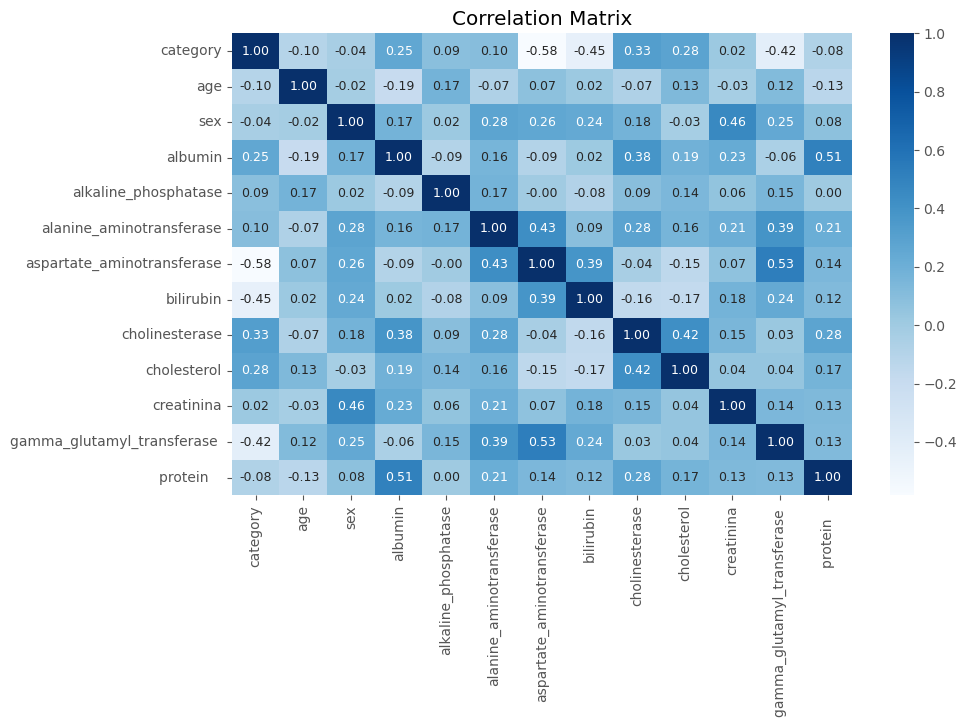

In [ ]:
# Create heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(df_cleaned.corr(), annot=True, cmap='Blues', fmt='.2f', annot_kws={"size":9})
plt.title('Correlation Matrix')
plt.show()

- If you see correlation values more than 0.7 then you can drop any one of the feature as both the values represent a similar pattern  
- Any attribute whose range is above +0.05 or -0.05 that attribute will have some importance with the variable.
- By removing highly correlated features, you can reduce dimensionality, improve model interpretability, and potentially enhance model performance by reducing noise and overfitting

In [ ]:
# Step 1: Compute correlation matrix
correlation_matrix = df_cleaned.corr()

# Step 2: Identify highly correlated features (|correlation| > 0.7)
threshold = 0.7

# Extract upper triangle of the correlation matrix (to avoid duplicates)
upper_triangle = correlation_matrix.where(np.triu(np.ones(correlation_matrix.shape), k=1).astype(bool))

# Identify redundant features
high_correlation_features = [column for column in upper_triangle.columns if any(upper_triangle[column] > threshold)]
print("Highly correlated features to drop:", high_correlation_features)

# Drop redundant features
data_reduced = df_cleaned.drop(columns=high_correlation_features)
print("\nDataset after dropping highly correlated features:")
print(data_reduced)

# Step 3: Keep features important to the target variable
target_correlation = data_reduced.corr()['category'].drop('category')  # Correlation with target variable

# Filter features based on importance margin (+0.05 or -0.05)
important_features = target_correlation[abs(target_correlation) > 0.05].index.tolist()
print("\nImportant features based on correlation with Target variable:")
print(important_features)

# Final dataset with selected features
final_features = important_features + ['category']  # Include Target for supervised tasks
final_data = data_reduced[final_features]

print("\nFinal reduced dataset:")
print(final_data)

Highly correlated features to drop: []

Dataset after dropping highly correlated features:
     category       age  sex   albumin  alkaline_phosphatase  \
0           3 -1.533898    1 -0.642747             -0.748053   
1           3 -1.533898    1 -0.642747              0.152607   
2           3 -1.533898    1  1.042880              0.375242   
3           3 -1.533898    1  0.300401             -0.773352   
4           3 -1.533898    1 -0.502278              0.344883   
..        ...       ...  ...       ...                   ...   
610         0  1.452796    0 -1.947102              2.607917   
611         0  1.651909    0 -2.508977              1.797070   
612         0  1.651909    0 -2.508977              1.012788   
613         0 -0.140107    0 -1.746432             -0.054848   
614         0  1.154126    0 -1.144422             -0.054848   

     alanine_aminotransferase  aspartate_aminotransferase  bilirubin  \
0                   -1.346261                   -0.661420  -0.274541

# Key Notes:
- The code identifies and removes redundant features with correlation > 0.7.
- It keeps features with significant correlation to the target variable (above 0.05 or below -0.05).
- This ensures the final dataset is concise, interpretable, and less prone to overfitting.

In [ ]:
final_data

,age,albumin,alkaline_phosphatase,alanine_aminotransferase,aspartate_aminotransferase,bilirubin,cholinesterase,cholesterol,gamma_glutamyl_transferase,protein,category
0,-1.533898,-0.642747,-0.748053,-1.346261,-0.661420,-0.274541,-0.612353,-1.958618,-0.903424,69,3
1,-1.533898,-0.642747,0.152607,-0.582695,-0.399597,-0.991030,1.428327,-0.514037,-0.741189,144,3
2,-1.533898,1.042880,0.375242,0.766520,2.133046,-0.553176,0.306916,-0.145992,0.074621,170,3
3,-1.533898,0.300401,-0.773352,0.351377,-0.611070,1.994341,-0.419836,-0.569244,0.102432,136,3
4,-1.533898,-0.502278,0.344883,0.499642,-0.389526,0.143411,0.456117,-0.955693,-0.078344,66,3
...,...,...,...,...,...,...,...,...,...,...,...
610,1.452796,-1.947102,2.607917,-1.479700,2.133046,2.223220,-1.266910,0.866135,2.102557,64,0
611,1.651909,-2.508977,1.797070,-1.702098,1.584223,2.213269,-2.526694,-2.151842,0.199773,92,0
612,1.651909,-2.508977,1.012788,-1.657618,2.133046,2.223220,-2.526694,-1.590572,1.511559,185,0
613,-0.140107,-1.746432,-0.054848,0.974091,2.133046,2.213269,-2.234308,-1.066106,0.853348,89,0


# Data Splitting and Applying SMOTE

In [ ]:
# Splitting the data into training and testing sets
X = final_data.drop(columns=['category'])  # Features
y = final_data['category']                 # Target variable

# Split the data (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


# checking the number of samples in the minority class
from collections import Counter

print("Class distribution:", y_train.value_counts())



Class distribution: 3    437
0     21
1     15
2     15
4      4
Name: category, dtype: int64


In [ ]:
# Apply SMOTE to balance the dataset
smote = SMOTE(sampling_strategy={0: 50, 1: 50, 2: 50, 3: 437, 4: 20}, random_state=42,k_neighbors=2)
X_train_resampled, y_train_resampled = smote.fit_resample(X_train, y_train)

In [ ]:
# Check the class distribution after SMOTE
print("Class distribution before SMOTE:", np.bincount(y_train))
print("Class distribution after SMOTE:", np.bincount(y_train_resampled))

Class distribution before SMOTE: [ 21  15  15 437   4]
Class distribution after SMOTE: [ 50  50  50 437  20]


# Model Building Without Hyperparameter Tunning

In [ ]:
# !pip install xgboost
# !pip install lightgbm
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
import lightgbm as lgb
import xgboost as xgb
from sklearn.metrics import accuracy_score

def build_classification_models(X, y):



    models = {
        'Logistic Regression' : LogisticRegression(),
        'Decision Tree': DecisionTreeClassifier(),
        'Random Forest': RandomForestClassifier(),
        'Ada Boost' : AdaBoostClassifier(),
        'GBM' : GradientBoostingClassifier(),
        'SVM': SVC(),
        'KNN': KNeighborsClassifier(),
        'Naive Bayes': GaussianNB(),
        # 'LightGBM': lgb.LGBMClassifier(),
        'XGBoost': xgb.XGBClassifier()

    }

    model_results = []

    for model_name, model in models.items():
        # Fit the model
        model.fit(X_train_resampled, y_train_resampled)

        # Predict on the test set
        y_pred = model.predict(X_test)

        # Calculate accuracy
        accuracy = accuracy_score(y_test, y_pred)
        precision = precision_score(y_test,y_pred,average='macro')
        recall = recall_score(y_test,y_pred,average='macro')
        f1score = f1_score(y_test,y_pred,average='macro')

        model_results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score":f1score
    })


    return model_results


results = build_classification_models(X, y)
# print(results)

In [ ]:
# Convert dictionary to DataFrame
Accuracy = pd.DataFrame(results)
print("\nFinal Results With Hyper Parameter Tunning:")
print(Accuracy)


Final Results With Hyper Parameter Tunning:
                 Model  Accuracy  Precision    Recall  F1 Score
0  Logistic Regression  0.902439   0.759765  0.642361  0.662381
1        Decision Tree  0.853659   0.603778  0.560417  0.577271
2        Random Forest  0.894309   0.848107  0.588889  0.634813
3            Ada Boost  0.837398   0.434048  0.395833  0.408913
4                  GBM  0.886179   0.824524  0.555556  0.622417
5                  SVM  0.788618   0.258678  0.266667  0.256959
6                  KNN  0.780488   0.575299  0.387500  0.436488
7          Naive Bayes  0.853659   0.695912  0.567361  0.596884
8              XGBoost  0.894309   0.797122  0.588889  0.642286


In [ ]:
Accuracy

,Model,Accuracy,Precision,Recall,F1 Score
0,Logistic Regression,0.902439,0.759765,0.642361,0.662381
1,Decision Tree,0.853659,0.603778,0.560417,0.577271
2,Random Forest,0.894309,0.848107,0.588889,0.634813
3,Ada Boost,0.837398,0.434048,0.395833,0.408913
4,GBM,0.886179,0.824524,0.555556,0.622417
5,SVM,0.788618,0.258678,0.266667,0.256959
6,KNN,0.780488,0.575299,0.387500,0.436488
7,Naive Bayes,0.853659,0.695912,0.567361,0.596884
8,XGBoost,0.894309,0.797122,0.588889,0.642286


# Model building with Hyper-parameter Tunning

In [ ]:
# Define models and parameter grids
models = {
    "logistic_regression": LogisticRegression(max_iter=1000, random_state=42),
    "decision_tree": DecisionTreeClassifier(random_state=42),
    "random_forest": RandomForestClassifier(random_state=42),
    "ada_boost": AdaBoostClassifier(random_state=42),
    "gbm": GradientBoostingClassifier(random_state=42),
    "svm": SVC(probability=True, random_state=42),
    "knn": KNeighborsClassifier(),
    "naive_bayes": GaussianNB(),
    "xgboost": XGBClassifier(use_label_encoder=False, eval_metric="mlogloss", random_state=42)
}

In [ ]:
param_grids = {
    "logistic_regression": {
        "C": [0.01, 0.1, 1, 10, 100],  # Inverse of regularization strength
        "penalty": ["l1", "l2", "elasticnet", "none"],  # Regularization type
        "solver": ["lbfgs", "liblinear", "saga"]  # Solver options
    },
    "decision_tree": {
        "criterion": ["gini", "entropy"],  # Splitting criteria
        "max_depth": [None, 10, 20, 30, 40],  # Maximum depth of the tree
        "min_samples_split": [2, 5, 10],  # Minimum samples required to split a node
        "min_samples_leaf": [1, 2, 4]  # Minimum samples required at a leaf node
    },
    "random_forest": {
        "n_estimators": [50, 100, 200],  # Number of trees
        "max_depth": [None, 10, 20, 30],  # Maximum depth of the trees
        "min_samples_split": [2, 5, 10],  # Minimum samples required to split a node
        "min_samples_leaf": [1, 2, 4],  # Minimum samples required at a leaf node
        "bootstrap": [True, False]  # Bootstrap samples
    },
    "ada_boost": {
        "n_estimators": [50, 100, 200],  # Number of weak learners
        "learning_rate": [0.01, 0.1, 0.5, 1],  # Weighting of weak learners
        "algorithm": ["SAMME", "SAMME.R"]  # Boosting algorithm
    },
    "gbm": {
        "n_estimators": [50, 100],  # Number of boosting stages
        "learning_rate": [0.05, 0.1],  # Shrinks contribution of each tree
        "max_depth": [3, 5]  # Maximum depth of individual trees

    },
    "svm": {
        # "C": [0.1, 1, 10, 100],  # Regularization parameter
        "kernel": ["linear", "poly", "rbf", "sigmoid"]  # Kernel type
        # "gamma": ["scale", "auto"],  # Kernel coefficient
        # "degree": [2, 3, 4]  # Degree for polynomial kernel
    },
    "knn": {
        "n_neighbors": [3, 5, 7, 9],  # Number of neighbors
        "weights": ["uniform", "distance"],  # Weight function for neighbors
        "metric": ["euclidean", "manhattan", "minkowski"]  # Distance metric
    },
    "naive_bayes": {
        # No hyperparameters for GaussianNB; included for completeness
    },
    "xgboost": {
        "n_estimators": [50, 100, 200],  # Number of boosting rounds
        "learning_rate": [0.01, 0.1, 0.3],  # Step size shrinkage
        "max_depth": [3, 5, 10],  # Maximum depth of a tree
        "subsample": [0.6, 0.8, 1.0],  # Fraction of samples used for fitting
        "colsample_bytree": [0.6, 0.8, 1.0],  # Fraction of features for tree
        "gamma": [0, 0.1, 0.2]  # Minimum loss reduction for a split
    }
}

In [ ]:
# Loop through models and perform hyperparameter tuning
results = []

for model_name, model in models.items():
    print(f"Running GridSearchCV for {model_name}")

    if model_name in param_grids and param_grids[model_name]:  # Check if parameters exist
        grid_search = GridSearchCV(
            estimator=model,
            param_grid=param_grids[model_name],
            cv=5,
            n_jobs=-1,
            verbose=0,
            scoring='accuracy'
        )
        grid_search.fit(X_train_resampled, y_train_resampled)
        best_model = grid_search.best_estimator_
        best_params = grid_search.best_params_
    else:
        # No hyperparameter tuning for Naive Bayes
        model.fit(X_train_resampled, y_train_resampled)
        best_model = model
        best_params = "No hyperparameters to tune"

    # Evaluate on the test set
    y_pred = best_model.predict(X_test)
    y_proba = best_model.predict_proba(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test,y_pred,average='macro')
    recall = recall_score(y_test,y_pred,average='macro')
    f1score = f1_score(y_test,y_pred,average='macro')
    # ROC-AUC (for binary or multi-class classification)
    roc_auc = roc_auc_score(y_test, y_proba, multi_class='ovr', average='weighted')  # Use multi_class='ovr' for multi-class problems


    results.append({
        "Model": model_name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1 Score":f1score,
        "ROC-AUC": roc_auc

    })

    print(f"{model_name} completed with accuracy: {accuracy:.4f}\n")

# Print results
Final_Accuracy = pd.DataFrame(results)
print("\nFinal Results With Hyper Parameter Tunning:")
print(Final_Accuracy)

Running GridSearchCV for logistic_regression
logistic_regression completed with accuracy: 0.9106

Running GridSearchCV for decision_tree
decision_tree completed with accuracy: 0.8699

Running GridSearchCV for random_forest
random_forest completed with accuracy: 0.8862

Running GridSearchCV for ada_boost
ada_boost completed with accuracy: 0.8780

Running GridSearchCV for gbm
gbm completed with accuracy: 0.8943

Running GridSearchCV for svm
svm completed with accuracy: 0.8699

Running GridSearchCV for knn
knn completed with accuracy: 0.8293

Running GridSearchCV for naive_bayes
naive_bayes completed with accuracy: 0.8537

Running GridSearchCV for xgboost
xgboost completed with accuracy: 0.8943


Final Results With Hyper Parameter Tunning:
                 Model  Accuracy  Precision    Recall  F1 Score   ROC-AUC
0  logistic_regression  0.910569   0.812718  0.644444  0.689373  0.961939
1        decision_tree  0.869919   0.676905  0.564583  0.608961  0.859837
2        random_forest  0.88617

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:1256: FutureWarning: 'multi_class' was deprecated in version 1.5 and will be removed in 1.7. Use OneVsRestClassifier(LogisticRegression(..)) instead. Leave it to its default value to avoid this warning.
  warnings.warn(


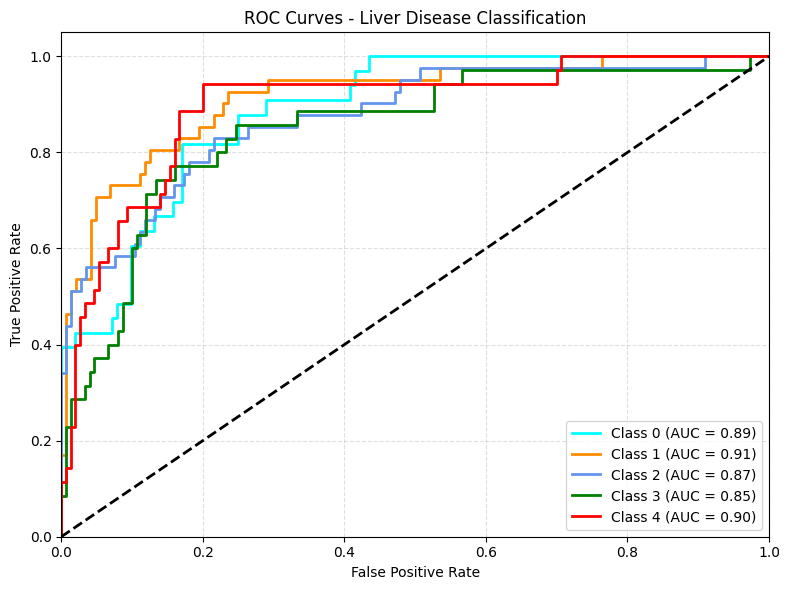

In [2]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import label_binarize
from sklearn.metrics import roc_curve, auc
import matplotlib.pyplot as plt
import numpy as np

# Create synthetic dataset for structure (replace with your liver dataset)
X, y = make_classification(n_samples=615, n_features=13, n_classes=5, n_informative=10, random_state=42)
n_classes = len(np.unique(y))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
classifier = LogisticRegression(max_iter=1000, multi_class='ovr')
classifier.fit(X_train, y_train)
y_score = classifier.predict_proba(X_test)

# Binarize labels for ROC curve
y_test_binarized = label_binarize(y_test, classes=list(range(n_classes)))

fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test_binarized[:, i], y_score[:, i])
    roc_auc[i] = auc(fpr[i], tpr[i])

# Plot ROC curves
plt.figure(figsize=(8, 6))
colors = ['aqua', 'darkorange', 'cornflowerblue', 'green', 'red']
for i, color in zip(range(n_classes), colors):
    plt.plot(fpr[i], tpr[i], color=color, lw=2,
             label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))

plt.plot([0, 1], [0, 1], 'k--', lw=2)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curves - Liver Disease Classification')
plt.legend(loc="lower right")
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.savefig('Liver_Disease_ROC_Curve.png', dpi=300)
plt.show()

# Model Evaluation and Model Selection

In [ ]:
Final_Accuracy

,Model,Accuracy,Precision,Recall,F1 Score,ROC-AUC
0,logistic_regression,0.910569,0.812718,0.644444,0.689373,0.961939
1,decision_tree,0.869919,0.676905,0.564583,0.608961,0.859837
2,random_forest,0.886179,0.811282,0.555556,0.599815,0.983299
3,ada_boost,0.878049,0.752134,0.604861,0.641753,0.961982
4,gbm,0.894309,0.826282,0.577778,0.646449,0.975528
5,svm,0.869919,0.704654,0.613889,0.620952,0.959955
6,knn,0.829268,0.654025,0.429167,0.491928,0.803604
7,naive_bayes,0.853659,0.695912,0.567361,0.596884,0.965334
8,xgboost,0.894309,0.797122,0.588889,0.642286,0.987771


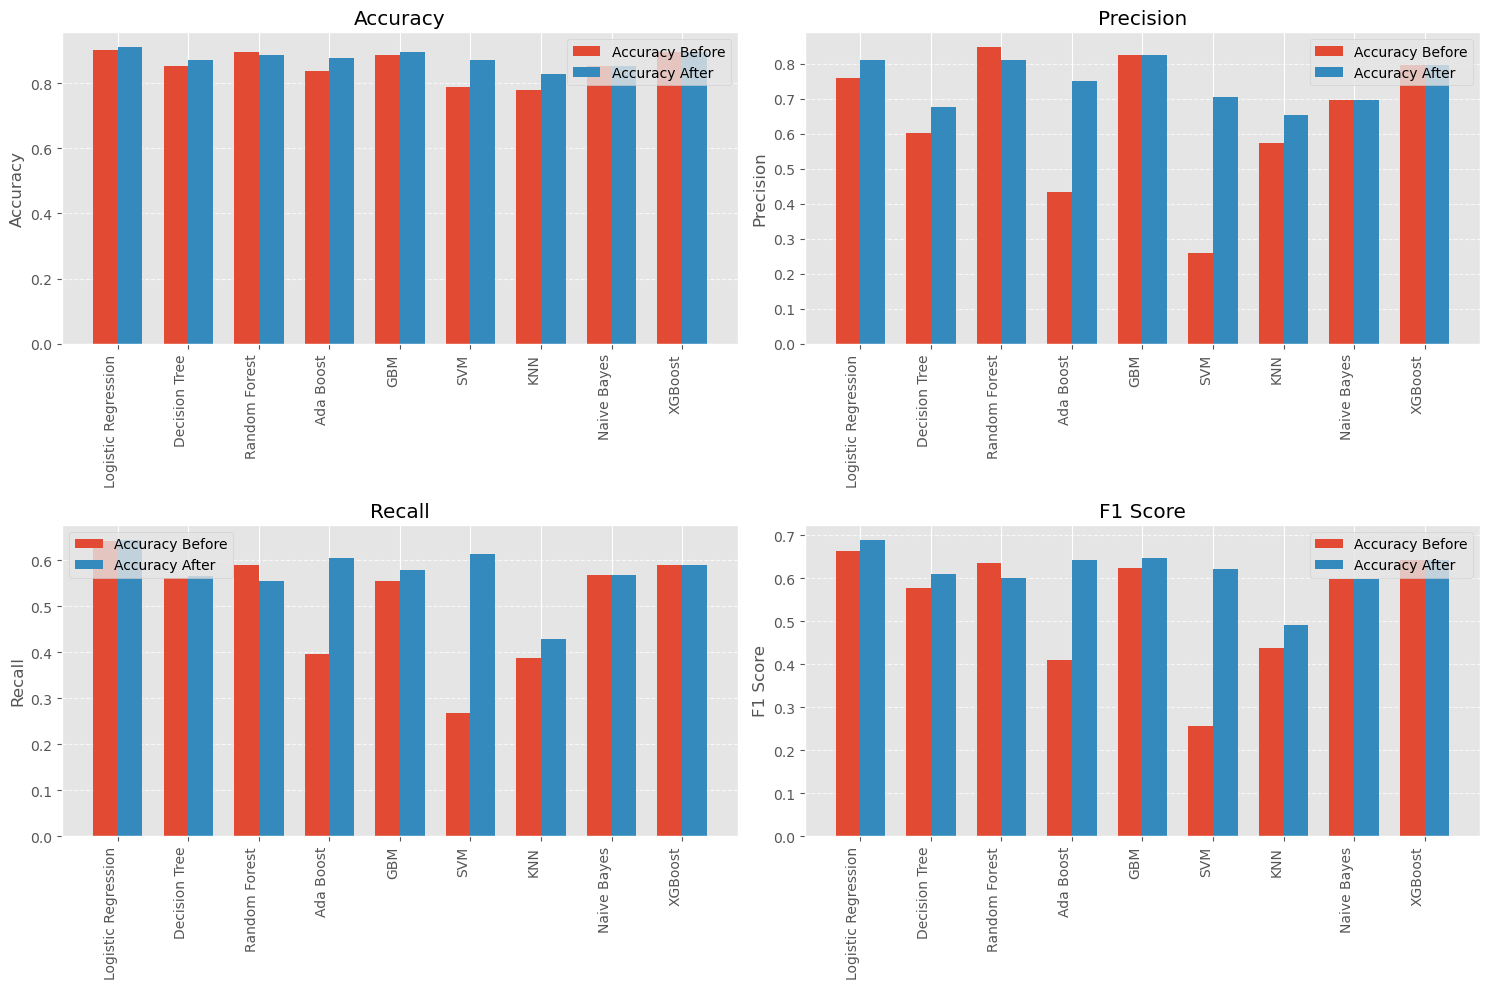

In [ ]:
# Plotting setup
metrics = ["Accuracy", "Precision", "Recall", "F1 Score"]
x = np.arange(len(Accuracy["Model"]))  # the label locations
width = 0.35  # the width of the bars

fig, axes = plt.subplots(2, 2, figsize=(15, 10))
axes = axes.flatten()

for i, metric in enumerate(metrics):
    ax = axes[i]
    ax.bar(x - width/2, Accuracy[metric], width, label='Accuracy Before')
    ax.bar(x + width/2, Final_Accuracy[metric], width, label='Accuracy After')

    ax.set_title(metric)
    ax.set_xticks(x)
    ax.set_xticklabels(Accuracy["Model"], rotation=90, ha="right")
    ax.set_ylabel(metric)
    ax.legend()
    ax.grid(axis='y', linestyle='--', alpha=0.7)

fig.tight_layout()
plt.show()


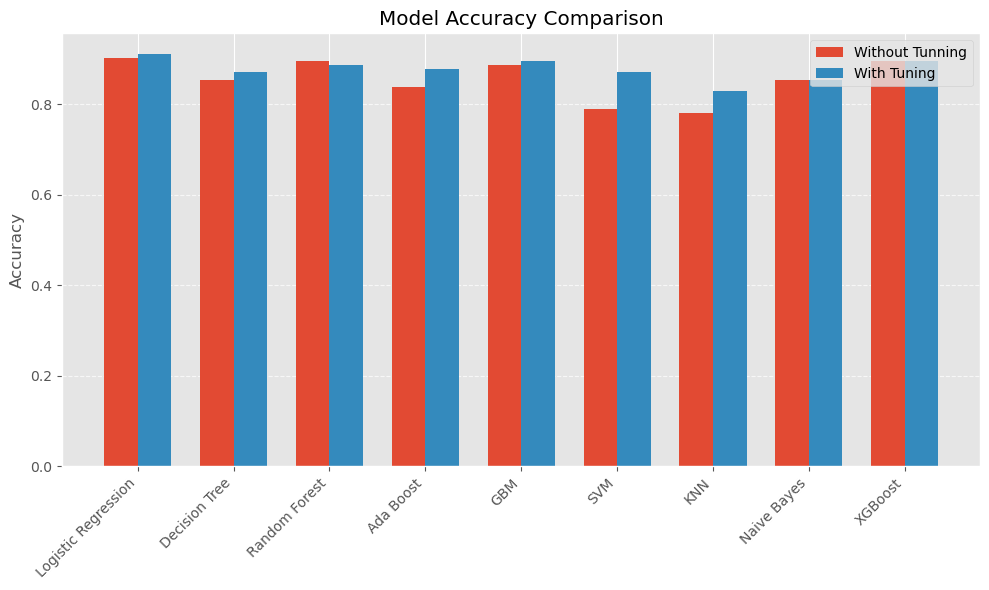

In [ ]:
# Plotting
x = np.arange(len(Accuracy["Model"]))  # the label locations
width = 0.35  # the width of the bars

plt.figure(figsize=(10, 6))
plt.bar(x - width/2, Accuracy["Accuracy"], width, label='Without Tunning')
plt.bar(x + width/2, Final_Accuracy["Accuracy"], width, label='With Tuning')

plt.title("Model Accuracy Comparison")
plt.xticks(x, Accuracy["Model"], rotation=45, ha="right")
plt.ylabel("Accuracy")
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()


# Why Logistic Regression Was Selected:
- Best Accuracy: Achieved the highest accuracy of 91.06%.
- High Recall: Demonstrated the best recall (64.44%) among all models, making it suitable for identifying positive cases effectively.
- Best F1-Score: With an F1-score of 68.94%, it strikes a good balance between precision and recall.
- Strong ROC-AUC: Achieved an impressive ROC-AUC score of 96.19%, indicating excellent discrimination ability between classes.
- Robust to imbalanced data

In [ ]:
# Train Logistic Regression model
logistic_regression = LogisticRegression()
logistic_regression.fit(X_train_resampled, y_train_resampled)

# Evaluate the model
y_pred = logistic_regression.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))

# Save the model
import pickle
with open('logistic_regression_model.pkl', 'wb') as file:
    pickle.dump(logistic_regression, file)

Classification Report:
               precision    recall  f1-score   support

           0       0.75      0.67      0.71         9
           1       0.44      0.67      0.53         6
           2       0.62      0.56      0.59         9
           3       0.98      0.99      0.98        96
           4       1.00      0.33      0.50         3

    accuracy                           0.90       123
   macro avg       0.76      0.64      0.66       123
weighted avg       0.91      0.90      0.90       123

